# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'notebook'

# graph font settings
rcParams['font.family'] = "serif"     
rcParams['font.size']=12

In [2]:
def phase_space_2d(data, output_var='Trees', input_var='harvest_nbrs', input_value=None, start_step=50):

    if not input_value:
        input_value = sorted(data[input_var].unique())[0]

    subset = data[data[input_var] == input_value]
    subset = subset.sort_values(by=['Step', 'RunId'])

    # Compute mean and derivative over the 20 runs for each time step
    mean_output = subset.groupby('Step')[output_var].mean().values
    derivative_output = np.gradient(mean_output)

    # Consider only the data from the specified start step onwards
    mean_output = mean_output[start_step:]
    derivative_output = derivative_output[start_step:]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(mean_output, derivative_output, label=f'Derivative vs {output_var}', color='blue')
    plt.xlabel(output_var)
    plt.ylabel(f'Derivative of {output_var}')
    plt.title(f'{output_var} vs Derivative for {input_var} = {input_value}')
    plt.legend()
    plt.grid(True)
    plt.show()

def phase_space_3d(data, output_var='Trees', input_var='harvest_nbrs', start_step=50):
    # Initialize lists to store the results
    input_var_values = sorted(data[input_var].unique())
    output_means = []
    output_derivatives = []

    # Process each unique value of the input variable
    for input_value in input_var_values:
        subset = data[data[input_var] == input_value]
        # Ensure the data is sorted by Step and RunId
        subset = subset.sort_values(by=['Step', 'RunId'])
        # Compute mean output variable over the 20 runs for each time step
        mean_output = subset.groupby('Step')[output_var].mean().values
        # Compute the derivative of the mean output variable
        derivative_output = np.gradient(mean_output)
        # Store the results starting from the specified start step
        output_means.append(mean_output[start_step:])
        output_derivatives.append(derivative_output[start_step:])

    # Convert lists to arrays for plotting
    output_means = np.array(output_means)
    output_derivatives = np.array(output_derivatives)

    # Create 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting
    for i, input_value in enumerate(input_var_values):
        ax.plot(input_value * np.ones_like(output_means[i]), output_means[i], output_derivatives[i], lw=0.5)

    # Labels
    ax.set_xlabel(input_var)
    ax.set_ylabel(output_var)
    ax.set_zlabel(f'Derivative of {output_var}')

    plt.title(f'Phase space plot of {output_var} for Various Values of {input_var}')
    plt.show()

In [3]:
n_max_timesteps=1000
n_replicates=20
n_distinct_samples=64
seed=42
table_read = pq.read_table(f'sa_results_seed_42.parquet')
data = table_read.to_pandas()
data

RunId  Step  harvest_volume  harvest_nbrs  harvest_prob  \
0             0     0       55.859375             3      0.820312   
1             0     1       55.859375             3      0.820312   
2             0     2       55.859375             3      0.820312   
3             0     3       55.859375             3      0.820312   
4             0     4       55.859375             3      0.820312   
...         ...   ...             ...           ...           ...   
15375355     19   996      133.984375             1      0.070312   
15375356     19   997      133.984375             1      0.070312   
15375357     19   998      133.984375             1      0.070312   
15375358     19   999      133.984375             1      0.070312   
15375359     19  1000      133.984375             1      0.070312   

          fert_comp_ratio_exponent  top_n_sites_percent  Trees  Fungi  \
0                         0.671875             0.648438    100     50   
1                         0.671875             0.648438     80     34   
2                         0.671875             0.648438     80     45   
3                         0.671875             0.648438     80     27   
4                         0.671875             0.648438    339     21   
...                            ...                  ...    ...    ...   
15375355                 -0.171875             0.539062    400      0   
15375356                 -0.171875             0.539062    397     58   
15375357                 -0.171875             0.539062    397     10   
15375358                 -0.171875             0.539062    397     10   
15375359                 -0.171875             0.539062    400      3   

          Living Trees Total Volume  Infected Trees  Mean Substrate  \
0                      13751.000000               0          1.0100   
1                      10569.759921               0          0.9500   
2                      10649.989006              11          0.9275   
3                      10720.647941              11          0.9025   
4                      11048.021320              11          0.8975   
...                             ...             ...             ...   
15375355                4361.993691              43          0.0425   
15375356                4146.919490              42          0.0475   
15375357                4222.785383              42          0.0225   
15375358                4299.345993              42          0.0200   
15375359                4379.020723              42          0.0175   

          Mean Soil Fertility  Harvested volume  SimId  
0                    0.487769          0.000000      0  
1                    0.177334       3312.968217      0  
2                    0.143895          0.000000      0  
3                    0.140196          0.000000      0  
4                    0.125871          0.000000      0  
...                       ...               ...    ...  
15375355             0.077338          0.000000  15359  
15375356             0.070764        290.611472  15359  
15375357             0.091760          0.000000  15359  
15375358             0.087184          0.000000  15359  
15375359             0.086514          0.000000  15359  

[15375360 rows x 15 columns]

In [25]:
subset = data[data['harvest_volume'] == 55.859375]
subset

RunId  Step  harvest_volume  harvest_nbrs  harvest_prob  \
0             0     0       55.859375             3      0.820312   
1             0     1       55.859375             3      0.820312   
2             0     2       55.859375             3      0.820312   
3             0     3       55.859375             3      0.820312   
4             0     4       55.859375             3      0.820312   
...         ...   ...             ...           ...           ...   
13453435     19   996       55.859375             2      0.882812   
13453436     19   997       55.859375             2      0.882812   
13453437     19   998       55.859375             2      0.882812   
13453438     19   999       55.859375             2      0.882812   
13453439     19  1000       55.859375             2      0.882812   

          fert_comp_ratio_exponent  top_n_sites_percent  Trees  Fungi  \
0                         0.671875             0.648438    100     50   
1                         0.671875             0.648438     80     34   
2                         0.671875             0.648438     80     45   
3                         0.671875             0.648438     80     27   
4                         0.671875             0.648438    339     21   
...                            ...                  ...    ...    ...   
13453435                  0.203125             0.851562    400      0   
13453436                  0.203125             0.851562    397     10   
13453437                  0.203125             0.851562    394      4   
13453438                  0.203125             0.851562    392      4   
13453439                  0.203125             0.851562    400      0   

          Living Trees Total Volume  Infected Trees  Mean Substrate  \
0                      13751.000000               0          1.0100   
1                      10569.759921               0          0.9500   
2                      10649.989006              11          0.9275   
3                      10720.647941              11          0.9025   
4                      11048.021320              11          0.8975   
...                             ...             ...             ...   
13453435                2303.006042              12          0.0125   
13453436                2190.176540              12          0.0150   
13453437                2070.468358              11          0.0075   
13453438                2056.776647              11          0.0100   
13453439                2058.311188              11          0.0125   

          Mean Soil Fertility  Harvested volume  SimId  
0                    0.487769          0.000000      0  
1                    0.177334       3312.968217      0  
2                    0.143895          0.000000      0  
3                    0.140196          0.000000      0  
4                    0.125871          0.000000      0  
...                       ...               ...    ...  
13453435             0.008149        169.898333  13439  
13453436             0.007057        169.020062  13439  
13453437             0.014997        172.013063  13439  
13453438             0.012455         57.867236  13439  
13453439             0.010136         55.928024  13439  

[240240 rows x 15 columns]

## For input variable harvest_nbrs

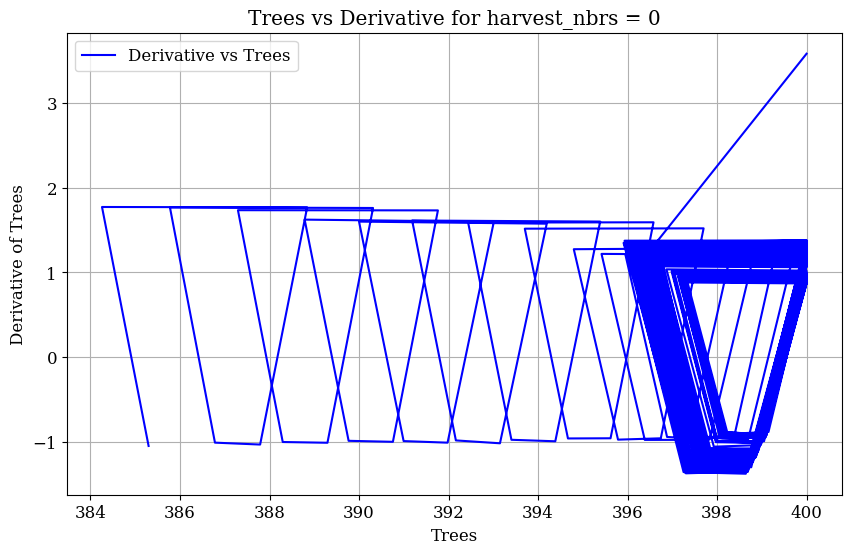

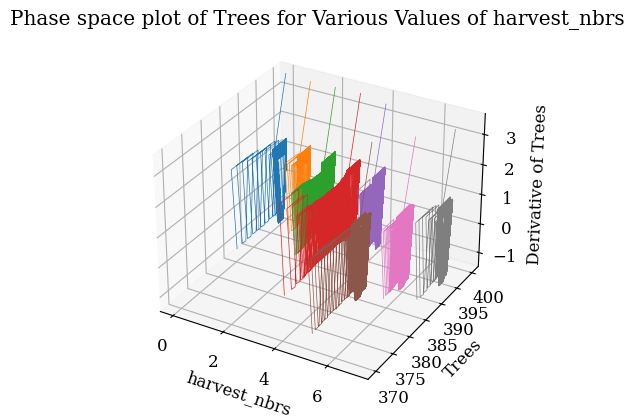

In [4]:
phase_space_2d(data, output_var='Trees', input_var='harvest_nbrs', start_step=50)
phase_space_3d(data, output_var='Trees', input_var='harvest_nbrs', start_step=50)

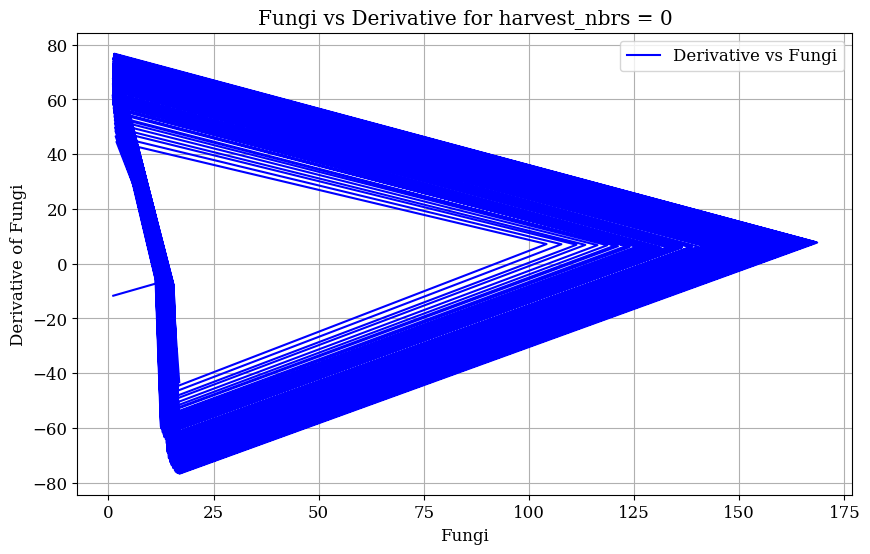

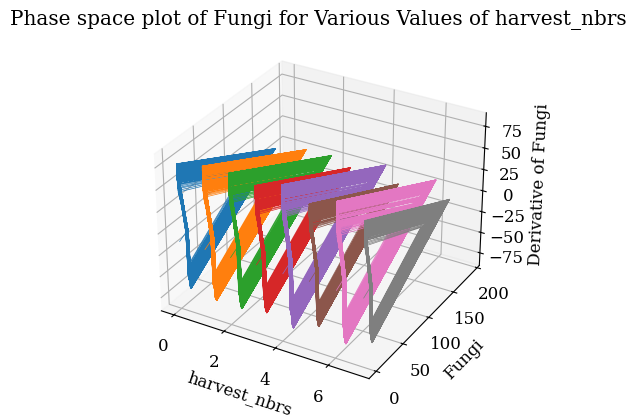

In [5]:
phase_space_2d(data, output_var='Fungi', input_var='harvest_nbrs', start_step=50)
phase_space_3d(data, output_var='Fungi', input_var='harvest_nbrs', start_step=50)

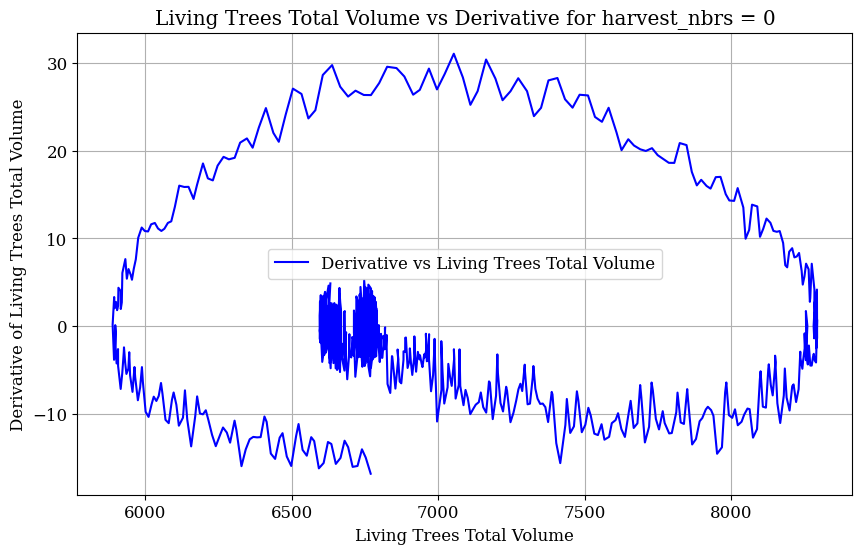

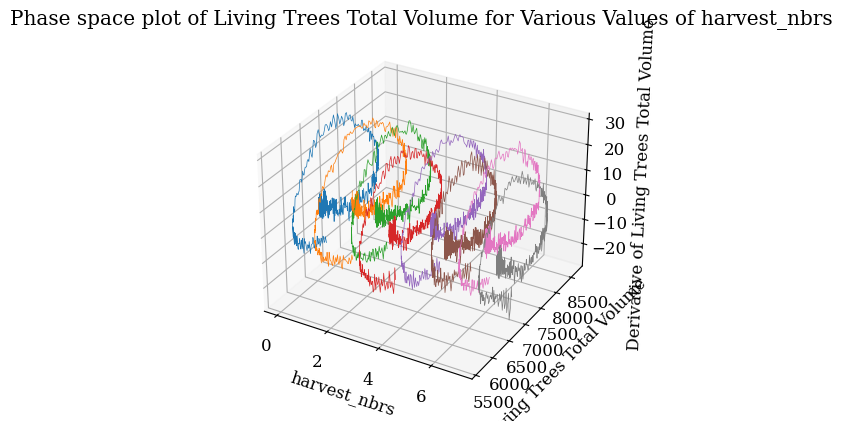

In [6]:
phase_space_2d(data, output_var='Living Trees Total Volume', input_var='harvest_nbrs', start_step=50)
phase_space_3d(data, output_var='Living Trees Total Volume', input_var='harvest_nbrs', start_step=50)

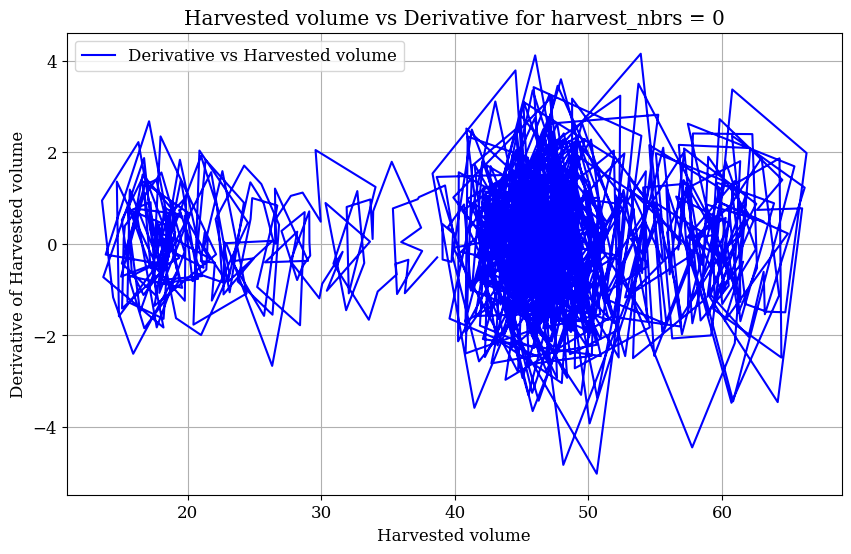

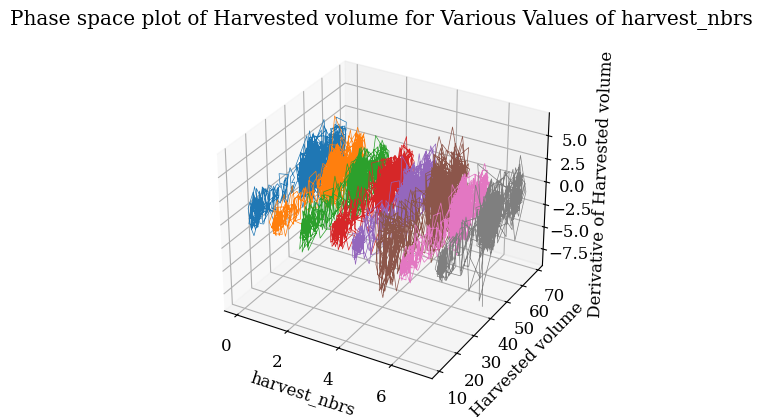

In [7]:
phase_space_2d(data, output_var='Harvested volume', input_var='harvest_nbrs', start_step=50)
phase_space_3d(data, output_var='Harvested volume', input_var='harvest_nbrs', start_step=50)

# What we should plot for harvested volume is the mean, SD, etc., to see that we get a consistent output!!

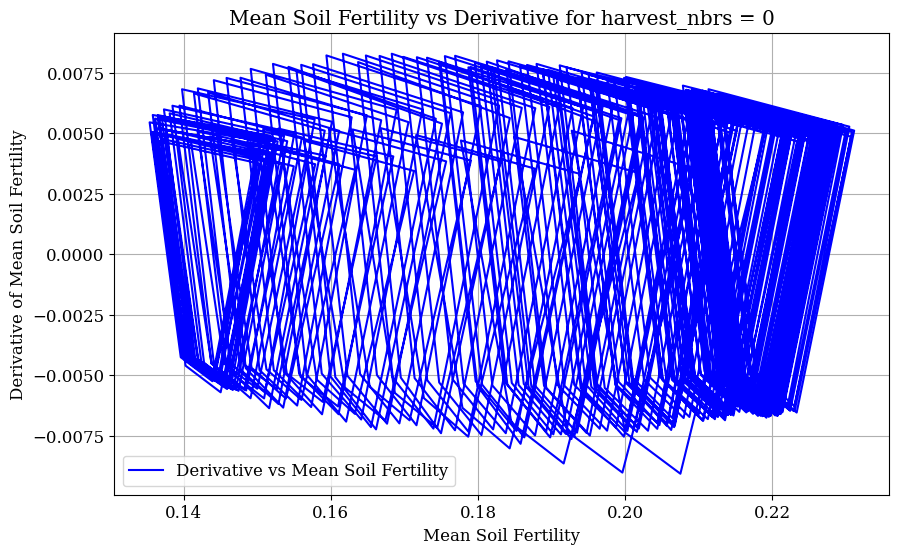

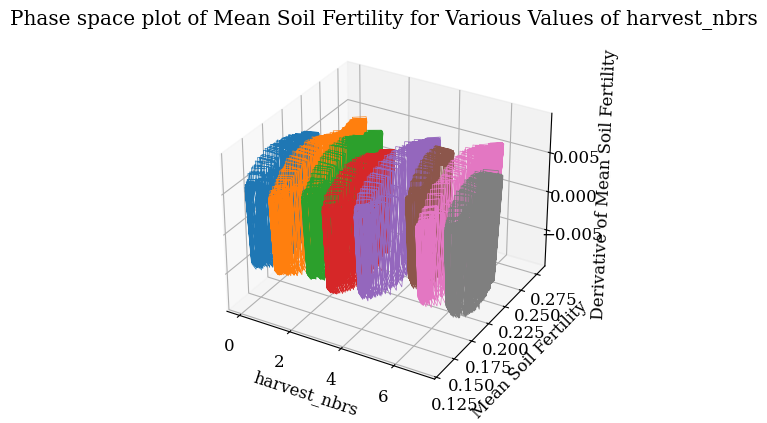

In [8]:
phase_space_2d(data, output_var='Mean Soil Fertility', input_var='harvest_nbrs', start_step=50)
phase_space_3d(data, output_var='Mean Soil Fertility', input_var='harvest_nbrs', start_step=50)

## For input variable harvest_volume

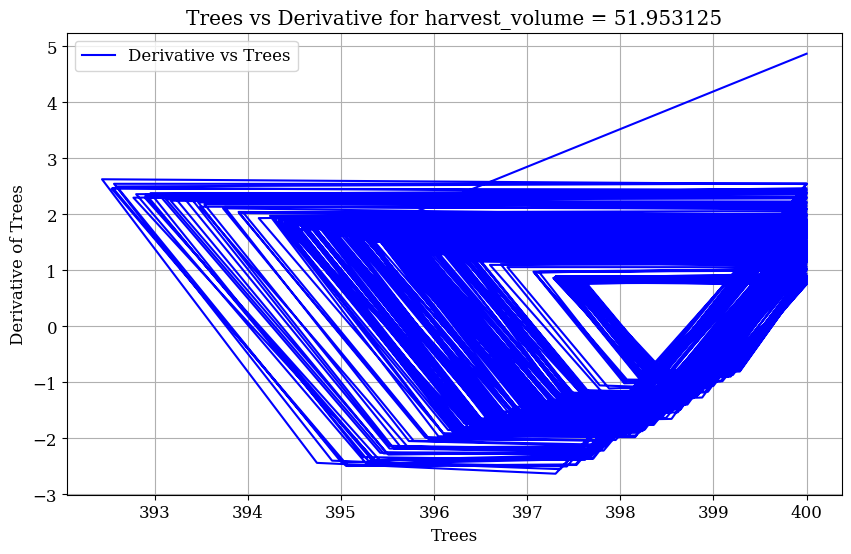

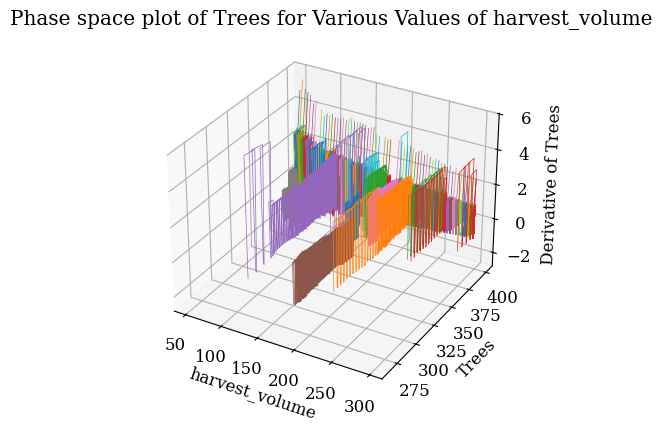

In [9]:
phase_space_2d(data, output_var='Trees', input_var='harvest_volume', start_step=50)
phase_space_3d(data, output_var='Trees', input_var='harvest_volume', start_step=50)

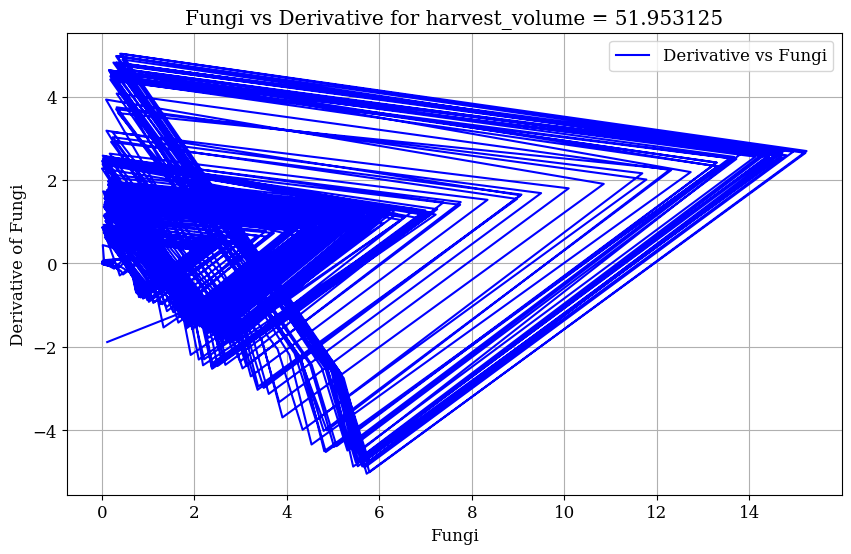

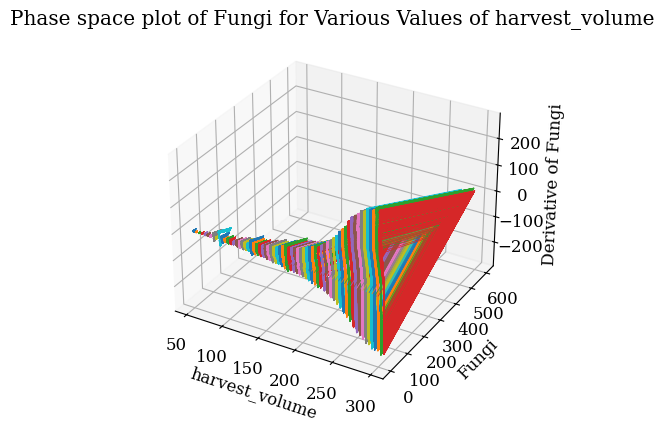

In [10]:
phase_space_2d(data, output_var='Fungi', input_var='harvest_volume', start_step=50)
phase_space_3d(data, output_var='Fungi', input_var='harvest_volume', start_step=50)

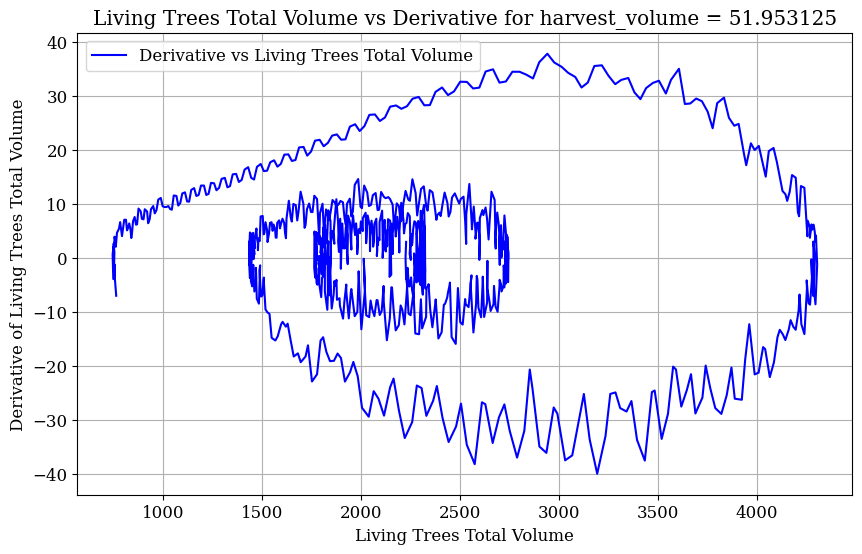

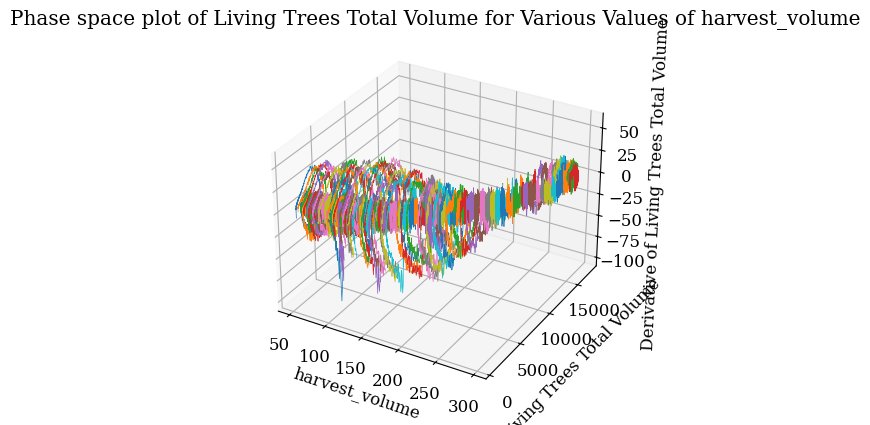

In [22]:
phase_space_2d(data, output_var='Living Trees Total Volume', input_var='harvest_volume', start_step=50)
# phase_space_2d(data, output_var='Living Trees Total Volume', input_var='harvest_volume', input_value=250, start_step=50)

phase_space_3d(data, output_var='Living Trees Total Volume', input_var='harvest_volume', start_step=50)

## For input variable harvest_prob

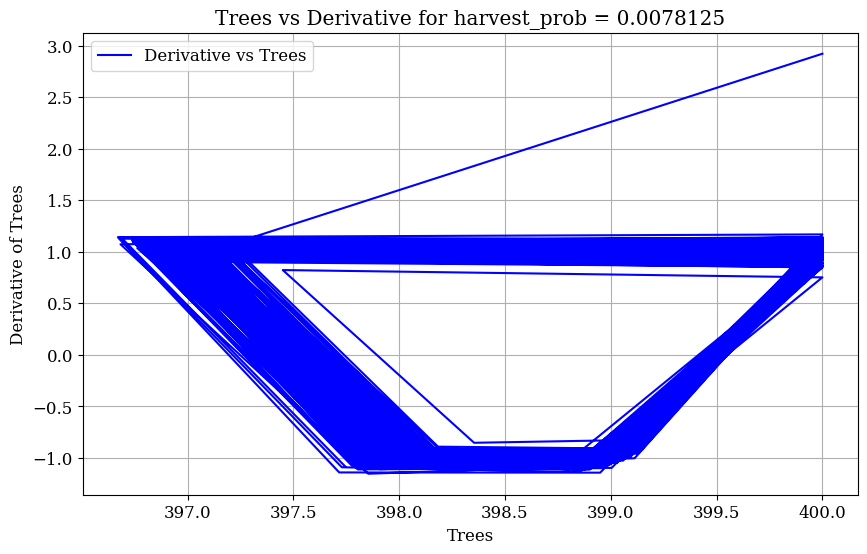

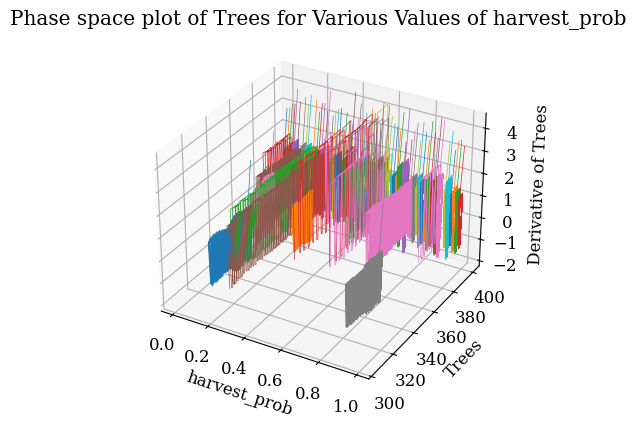

In [12]:
phase_space_2d(data, output_var='Trees', input_var='harvest_prob', start_step=50)
phase_space_3d(data, output_var='Trees', input_var='harvest_prob', start_step=50)

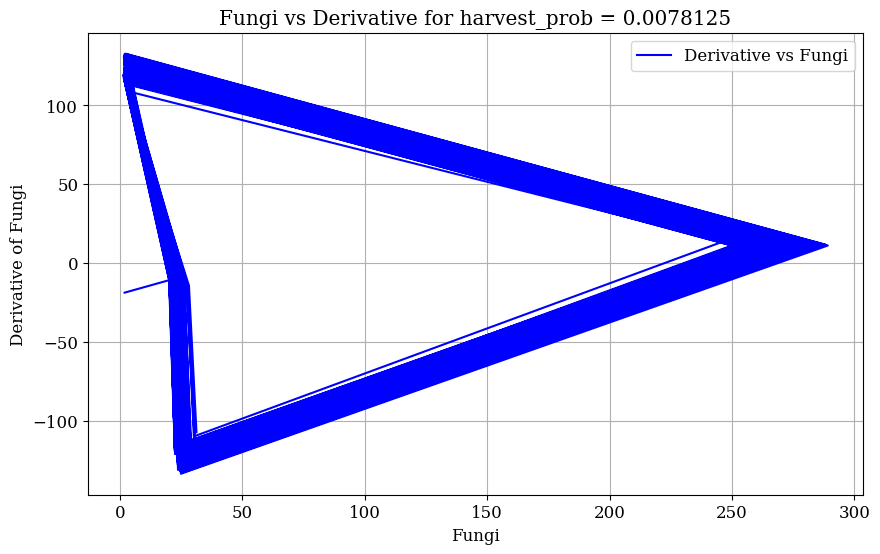

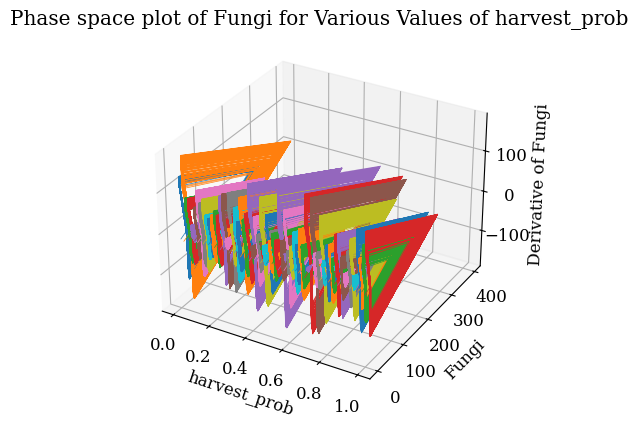

In [13]:
phase_space_2d(data, output_var='Fungi', input_var='harvest_prob', start_step=50)
phase_space_3d(data, output_var='Fungi', input_var='harvest_prob', start_step=50)

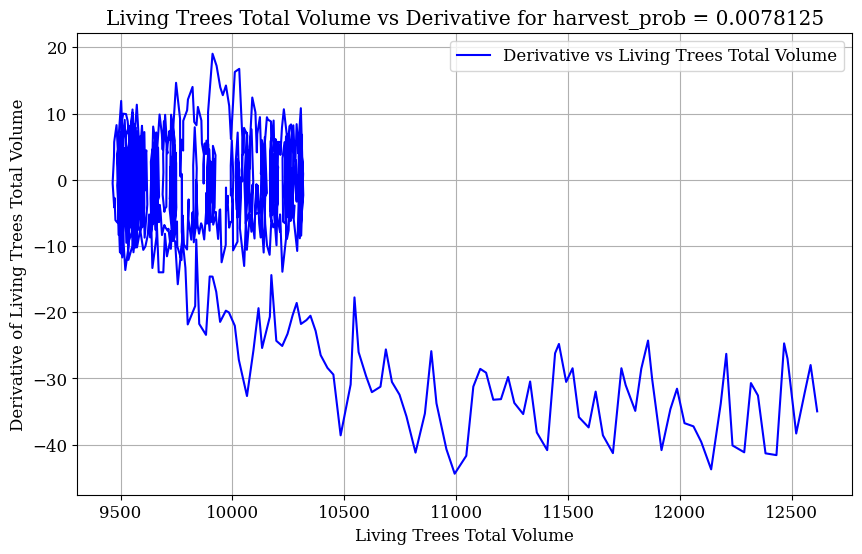

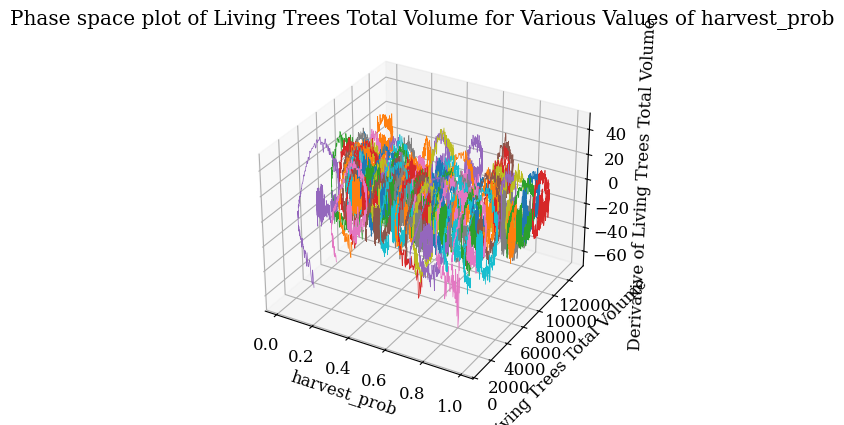

In [23]:
phase_space_2d(data, output_var='Living Trees Total Volume', input_var='harvest_prob', start_step=50)
phase_space_3d(data, output_var='Living Trees Total Volume', input_var='harvest_prob', start_step=50)

## For input variable fert_comp_ratio_exponent

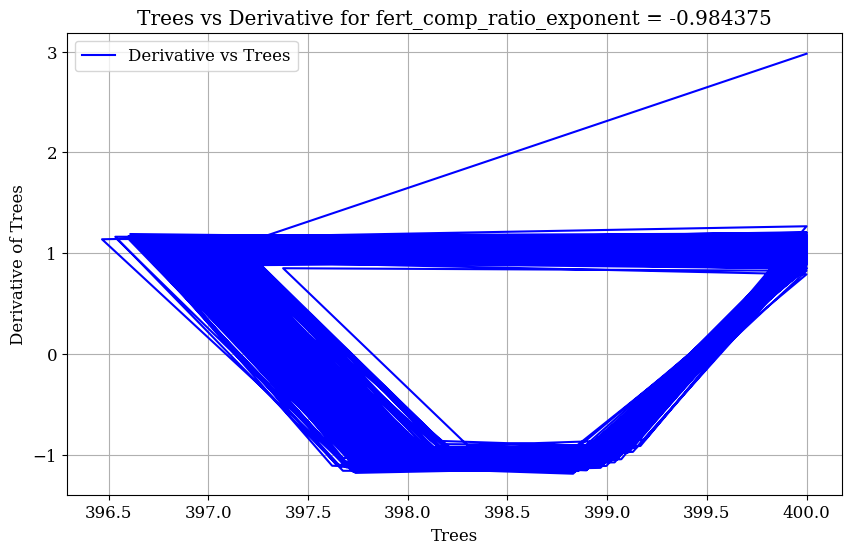

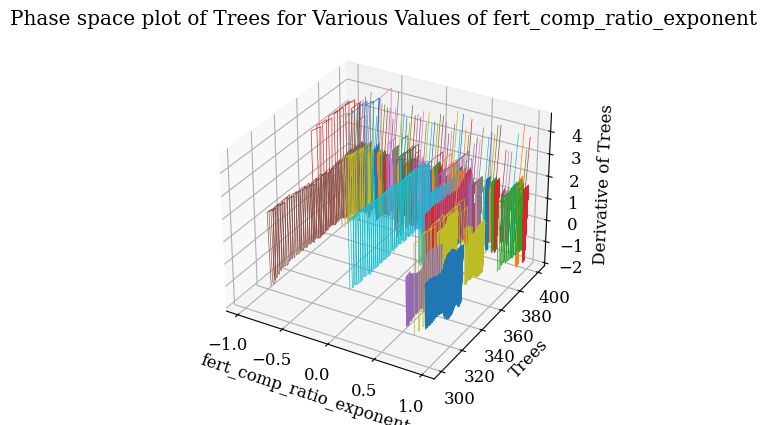

In [15]:
phase_space_2d(data, output_var='Trees', input_var='fert_comp_ratio_exponent', start_step=50)
phase_space_3d(data, output_var='Trees', input_var='fert_comp_ratio_exponent', start_step=50)

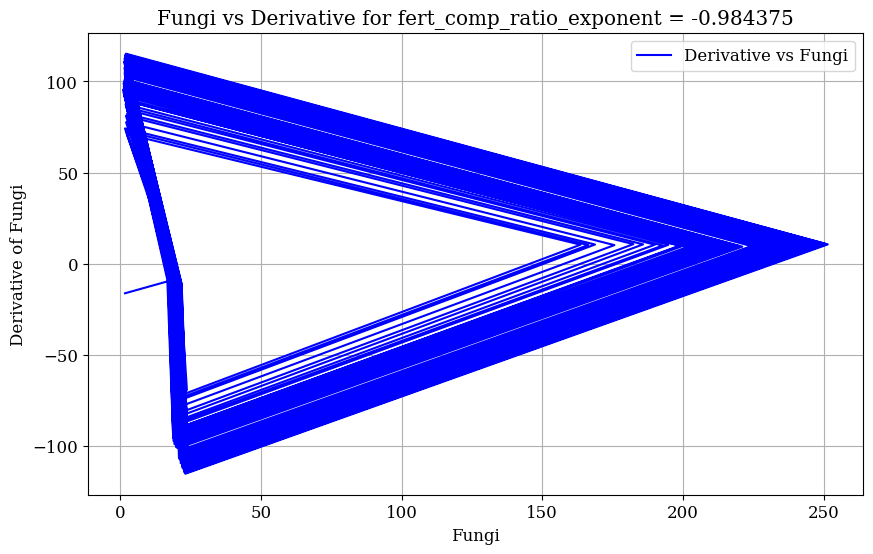

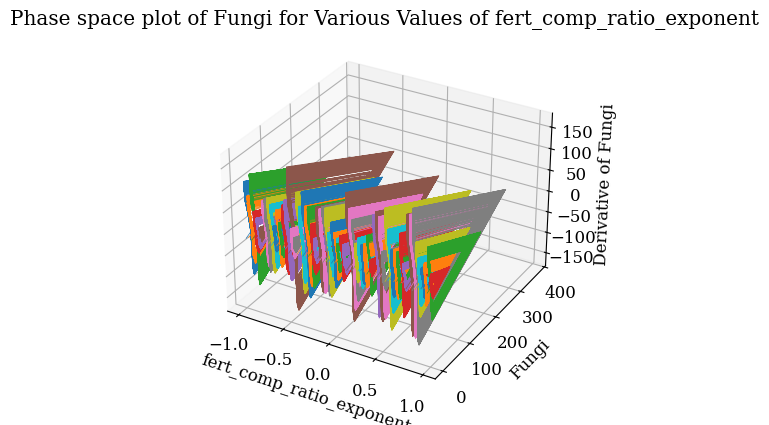

In [16]:
phase_space_2d(data, output_var='Fungi', input_var='fert_comp_ratio_exponent', start_step=50)
phase_space_3d(data, output_var='Fungi', input_var='fert_comp_ratio_exponent', start_step=50)

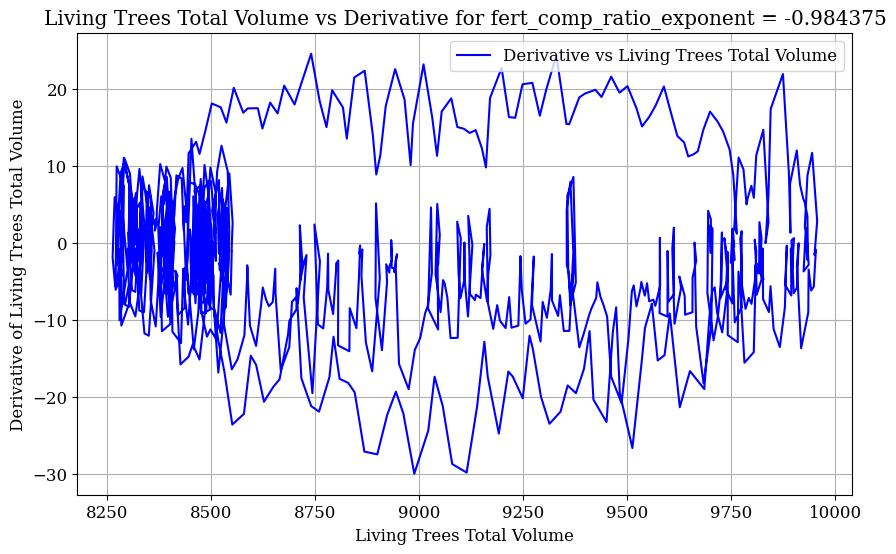

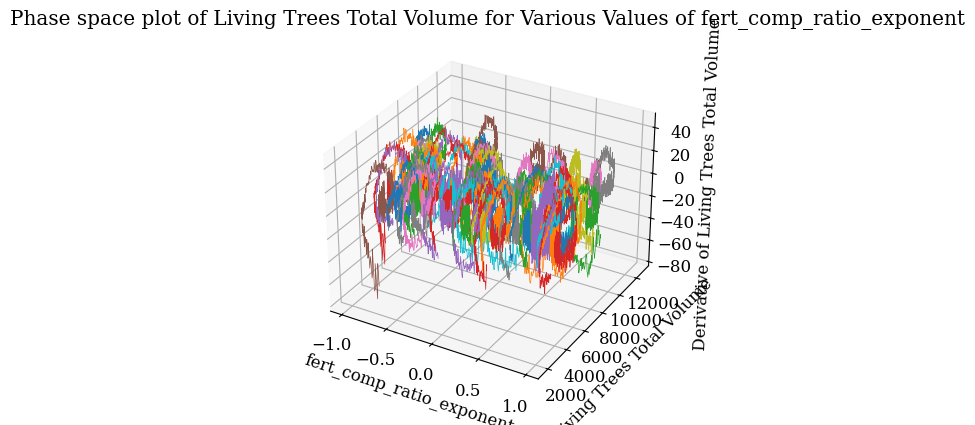

In [17]:
phase_space_2d(data, output_var='Living Trees Total Volume', input_var='fert_comp_ratio_exponent', start_step=50)
phase_space_3d(data, output_var='Living Trees Total Volume', input_var='fert_comp_ratio_exponent', start_step=50)

## For input variable top_n_sites_percent

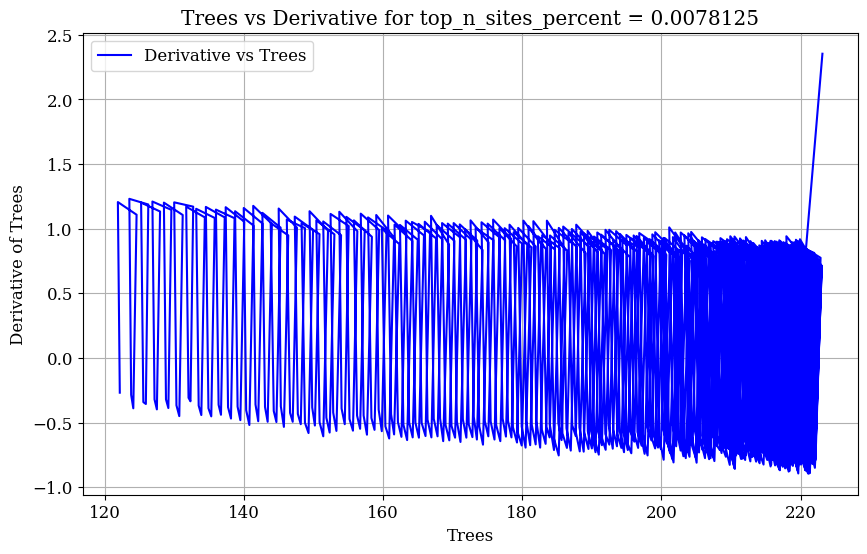

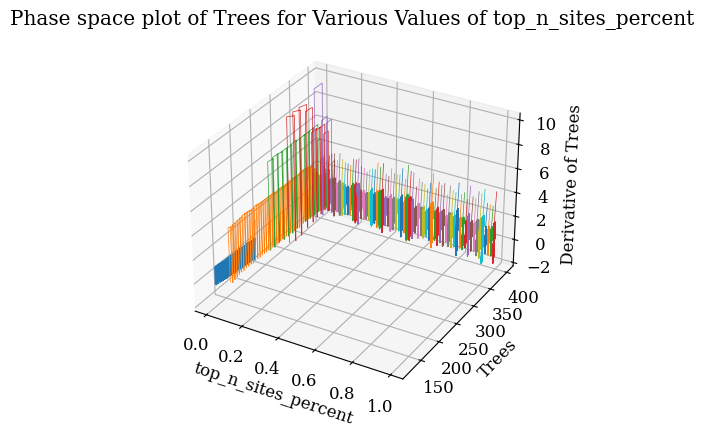

In [18]:
phase_space_2d(data, output_var='Trees', input_var='top_n_sites_percent', start_step=50)
phase_space_3d(data, output_var='Trees', input_var='top_n_sites_percent', start_step=50)

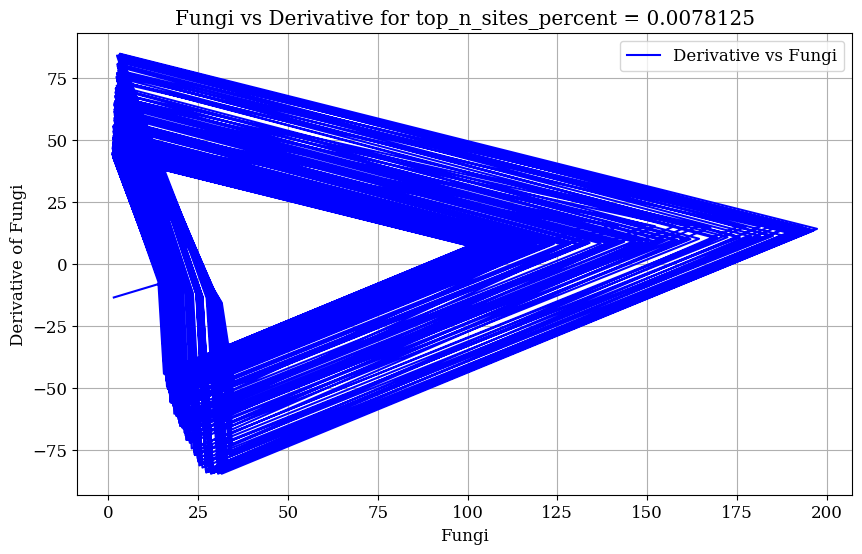

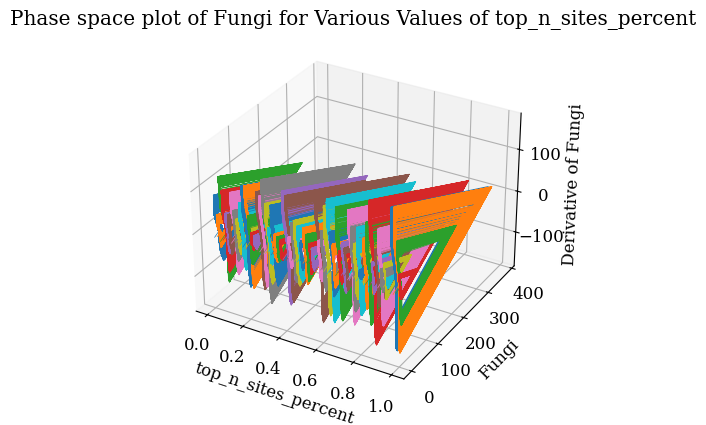

In [19]:
phase_space_2d(data, output_var='Fungi', input_var='top_n_sites_percent', start_step=50)
phase_space_3d(data, output_var='Fungi', input_var='top_n_sites_percent', start_step=50)

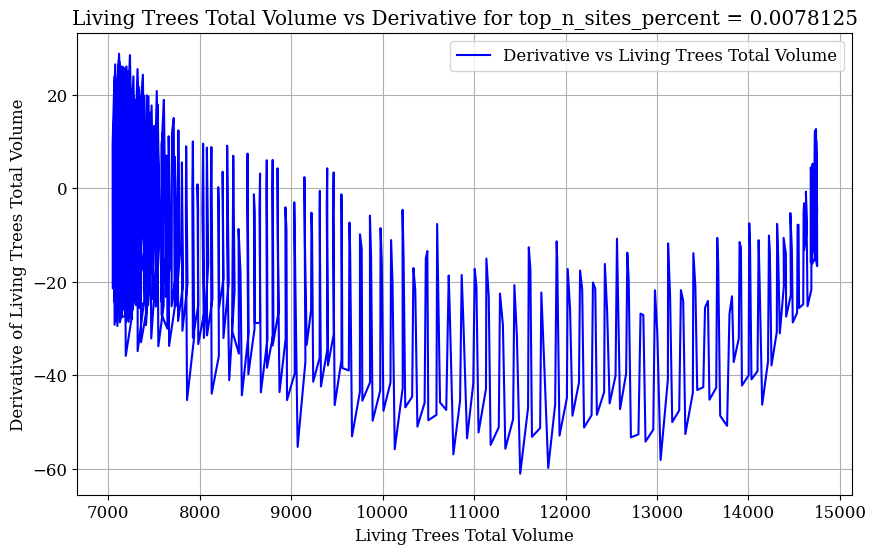

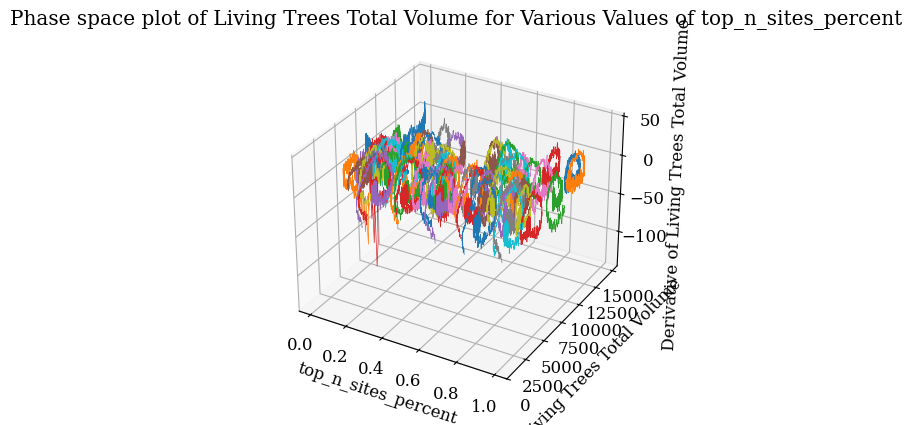

In [20]:
phase_space_2d(data, output_var='Living Trees Total Volume', input_var='top_n_sites_percent', start_step=50)
phase_space_3d(data, output_var='Living Trees Total Volume', input_var='top_n_sites_percent', start_step=50)